In [69]:
import numpy as np
import cv2
import pandas as pd
import os

In [71]:
train_images_path="C:/Users/sudha/cloneimae/Train"

df=pd.read_csv('mine.csv')
df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [72]:
mapping={'YOUNG':0,'MIDDLE':1,'OLD':2}
df['Class']=df['Class'].map(mapping)
df.head()
df['ID']=df['ID'].astype(str)
print(df['ID'].dtype)
print(df['Class'].value_counts())

object
1    49
0    33
2    14
Name: Class, dtype: int64


In [73]:
print("Training Data Info:")
print(df.info())
print(df['Class'].value_counts())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      96 non-null     object
 1   Class   96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None
1    49
0    33
2    14
Name: Class, dtype: int64


In [74]:
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

train_images = []
train_labels = []

for idx, row in df.iterrows():
    image_path = os.path.join(train_images_path, row['ID'])
    image = load_and_preprocess_image(image_path)
    train_images.append(image)
    train_labels.append(row['Class'])

train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_labels)

[1 0 1 0 1 1 0 0 0 2 0 1 1 1 1 1 2 0 2 1 0 2 0 1 1 0 1 2 1 0 0 0 1 1 1 0 1
 1 1 0 1 0 1 1 2 1 0 1 1 0 1 1 1 0 1 1 2 1 2 1 0 1 0 0 1 1 2 0 0 0 0 1 2 1
 1 2 0 1 1 1 1 1 1 0 2 1 0 1 0 1 2 0 1 0 2 0]


In [76]:
train_labels=to_categorical(train_labels,num_classes=3
                          )
# print(train_labels)

In [126]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = datagen.flow(train_images, train_labels, subset='training', batch_size=32)
validation_generator = datagen.flow(train_images, train_labels, subset='validation', batch_size=32)

In [78]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=100)

Epoch 1/100
3/3 [==============================] - 70s 14s/step - loss: 1.4788 - accuracy: 0.3766 - val_loss: 1.0623 - val_accuracy: 0.3684
Epoch 2/100
3/3 [==============================] - 7s 3s/step - loss: 1.1240 - accuracy: 0.3896 - val_loss: 1.0733 - val_accuracy: 0.4737
Epoch 3/100
3/3 [==============================] - 7s 2s/step - loss: 1.0410 - accuracy: 0.5325 - val_loss: 1.0471 - val_accuracy: 0.4737
Epoch 4/100
3/3 [==============================] - 7s 2s/step - loss: 1.0339 - accuracy: 0.5195 - val_loss: 1.0461 - val_accuracy: 0.4737
Epoch 5/100
3/3 [==============================] - 7s 3s/step - loss: 0.9628 - accuracy: 0.5325 - val_loss: 1.0616 - val_accuracy: 0.4737
Epoch 6/100
3/3 [==============================] - 7s 3s/step - loss: 0.9590 - accuracy: 0.5065 - val_loss: 1.0199 - val_accuracy: 0.4737
Epoch 7/100
3/3 [==============================] - 7s 3s/step - loss: 0.9865 - accuracy: 0.5325 - val_loss: 1.0412 - val_accuracy: 0.4737
Epoch 8/100
3/3 [===============

Epoch 60/100
3/3 [==============================] - 7s 2s/step - loss: 0.6220 - accuracy: 0.7143 - val_loss: 2.6898 - val_accuracy: 0.2632
Epoch 61/100
3/3 [==============================] - 7s 2s/step - loss: 0.6018 - accuracy: 0.7273 - val_loss: 2.2094 - val_accuracy: 0.3158
Epoch 62/100
3/3 [==============================] - 7s 2s/step - loss: 0.5653 - accuracy: 0.7273 - val_loss: 3.0027 - val_accuracy: 0.3684
Epoch 63/100
3/3 [==============================] - 7s 2s/step - loss: 0.6049 - accuracy: 0.6883 - val_loss: 2.3624 - val_accuracy: 0.3684
Epoch 64/100
3/3 [==============================] - 7s 2s/step - loss: 0.6623 - accuracy: 0.7013 - val_loss: 2.3603 - val_accuracy: 0.3684
Epoch 65/100
3/3 [==============================] - 7s 3s/step - loss: 0.6583 - accuracy: 0.7143 - val_loss: 2.3336 - val_accuracy: 0.2632
Epoch 66/100
3/3 [==============================] - 8s 2s/step - loss: 0.6352 - accuracy: 0.7532 - val_loss: 1.6336 - val_accuracy: 0.2105
Epoch 67/100
3/3 [=========

In [80]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

1/1 [==============================] - 1s 750ms/step - loss: 2.8872 - accuracy: 0.2105
Validation Loss: 2.8872146606445312, Validation Accuracy: 0.21052631735801697


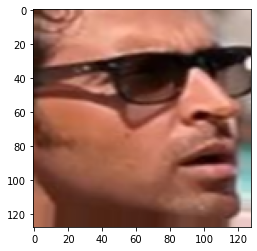

In [83]:
import matplotlib.pyplot as plt
# plt.imshow(X_train[1])
# plt.show()

plt.imshow(validation_generator[0][0][1])
plt.show()

In [87]:
sample_images = validation_generator[0][0][1]


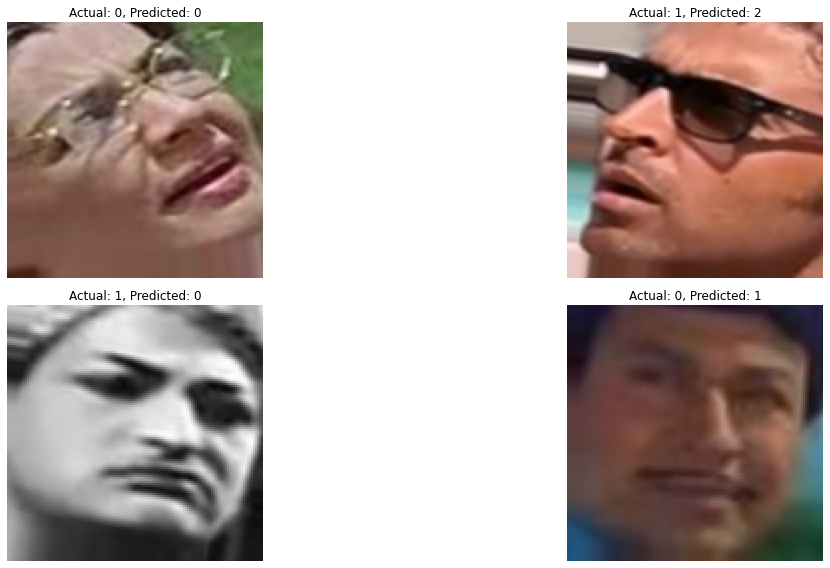

In [90]:
sample_images = validation_generator[0][0][:10]
sample_labels = np.argmax(validation_generator[0][1][:10], axis=1)
sample_preds = np.argmax(model.predict(sample_images), axis=1)

fig, axes = plt.subplots(2,2, figsize=(20, 8))
axes = axes.flatten()

for img, lbl, pred, ax in zip(sample_images, sample_labels, sample_preds, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Actual: {lbl}, Predicted: {pred}')

plt.tight_layout()
plt.show()

In [89]:
model.save('sudha_age_detection_model.h5')

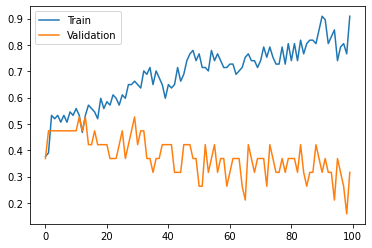

In [92]:
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"]);
plt.legend(['Train', 'Validation'], loc='upper left');

In [94]:
from tensorflow.keras.models import load_model
load=load_model('sudha_age_detection_model.h5')

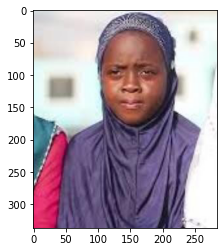

In [120]:
test_path = 'C:/Users/sudha/cloneimae/part3'
test_files = os.listdir(test_path)

test_x = plt.imread(os.path.join(test_path, test_files[5]))
plt.imshow(test_x)

In [121]:
def preprocess_test_image(image):
   
    image_resized = cv2.resize(image, (128,128), interpolation=cv2.INTER_LINEAR)
    
   
    image_normalized = image_resized / 255.0
    
    image_expaned = np.expand_dims(image_normalized, axis=0)
    
    return image_expaned

def predict_class(pred_model, image):
    
    processed_img = preprocess_test_image(image)
   
    pred_probas = pred_model.predict(processed_img)
   
    pred_class = pred_probas.argmax()
    print(pred_class)

    return list(mapping.keys())[pred_class]

In [122]:
prd=predict_class(load, test_x)


0


0
Class: YOUNG


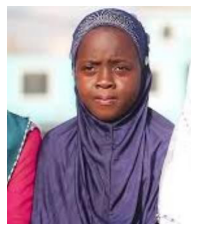

In [123]:
plt.axis("off")
plt.imshow(test_x)

pred = predict_class(load, test_x)
print(f"Class: {pred}")

# the task has been end



In [18]:
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     validation_split=0.2
# )

In [25]:
# train_generator = datagen.flow(train_images, train_labels, subset='training', batch_size=32)
# validation_generator = datagen.flow(train_images, train_labels, subset='validation', batch_size=32)

In [48]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(4, activation="softmax")
])


In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.25, random_state=0)

print(f"X train Shape: {X_train.shape}")
print(f"X Validation Shape: {X_val.shape}")
print(f"y Train Shape: {y_train.shape}")
print(f"y Validation Shape: {y_val.shape}")

X train Shape: (72, 128, 128, 3)
X Validation Shape: (24, 128, 128, 3)
y Train Shape: (72, 3)
y Validation Shape: (24, 3)


In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(y_train
    )
y_train=y

(72, 128, 128, 3)
(72, 3)
(24, 128, 128, 3)
(24, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


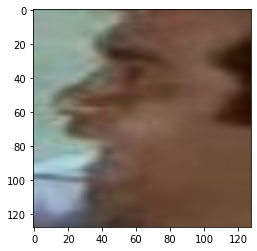

In [33]:
import matplotlib.pyplot as plt
# plt.imshow(X_train[1])
# plt.show()

plt.imshow(X_val[0])
plt.show()

In [58]:
from tensorflow.keras.applications.resnet import ResNet50
input_shape = (180, 180, 3)


resnet_base = ResNet50(weights='imagenet',
                       include_top = False,
                       input_shape = input_shape)


for layer in resnet_base.layers:
    layer.trainable = False

# Define the model
model = Sequential([
    resnet_base,  
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               18874624  
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)              

In [53]:

model.fit(X_train,y_train,epochs=70,validation_data=(X_train,y_val))

Epoch 1/70


ValueError: in user code:

    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\sudha\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 3) and (None, 4) are incompatible
